In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_excel('card_transdata - with sample ID.xlsx')

# Drop unwanted columns
df = df.drop(['transaction_id','ratio_to_median_purchase_price'], axis=1)
df.head()

,distance_from_home,distance_from_last_transaction,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1,1,0,0,0
1,10.829943,0.175592,1,0,0,0,0
2,5.091079,0.805153,1,0,0,1,0
3,2.247564,5.600044,1,1,0,1,0
4,44.190936,0.566486,1,1,0,1,0


In [2]:
# Split the data into target and predictors
y = df.fraud
X = df.drop(columns=['fraud'], axis=1)

In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [4]:
# Normalize the data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X.head()

,distance_from_home,distance_from_last_transaction,repeat_retailer,used_chip,used_pin_number,online_order
0,0.005443,0.000026,1.0,1.0,0.0,0.0
1,0.001018,0.000015,1.0,0.0,0.0,0.0
2,0.000478,0.000068,1.0,0.0,0.0,1.0
3,0.000211,0.000473,1.0,1.0,0.0,1.0
4,0.004156,0.000048,1.0,1.0,0.0,1.0


In [5]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False,C=1e12, solver='liblinear')


# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [6]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [7]:
# How many times was the classifier correct on the training set?
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))
# 644,846 correct, ~ 86% accuracy

0    645096
1    104904
Name: fraud, dtype: int64
------------------------------------
0    0.860128
1    0.139872
Name: fraud, dtype: float64


In [8]:
# How many times was the classifier correct on the test set?
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))
# 215,265 correct, ~ 86% accuracy

0    215016
1     34984
Name: fraud, dtype: int64
------------------------------------
0    0.860064
1    0.139936
Name: fraud, dtype: float64


In [9]:
# Calculating metrics with sklearn
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.15412287507935388
Testing Precision:  0.1540990450347023



Training Recall:  0.13307753212741336
Testing Recall:  0.13591383992267686



Training Accuracy:  0.860128
Testing Accuracy:  0.860064



Training F1-Score:  0.142829127990587
Testing F1-Score:  0.14443629249205184


In [10]:
#Calculating metrics for test and training splits using different training sizes
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10, 95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100.0)
    logreg = LogisticRegression(fit_intercept=False, C=1e25, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)

    training_precision.append(precision(y_train, y_hat_train))
    testing_precision.append(precision(y_test, y_hat_test))
    training_recall.append(recall(y_train, y_hat_train))
    testing_recall.append(recall(y_test, y_hat_test))
    training_accuracy.append(accuracy(y_train, y_hat_train))
    testing_accuracy.append(accuracy(y_test, y_hat_test))
    training_f1.append(f1(y_train, y_hat_train))
    testing_f1.append(f1(y_test, y_hat_test))

NameError: name 'precision' is not defined

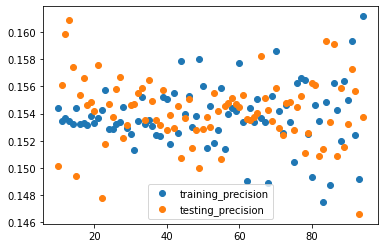

In [ ]:
# Train and test precision
plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
plt.legend()
plt.show()

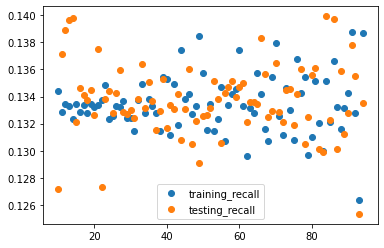

In [ ]:
# Train and test recall
plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
plt.legend()
plt.show()

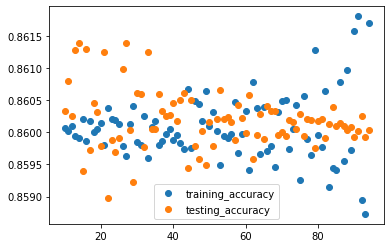

In [ ]:
# Train and test accuracy
plt.scatter(list(range(10, 95)), training_accuracy, label='training_accuracy')
plt.scatter(list(range(10, 95)), testing_accuracy, label='testing_accuracy')
plt.legend()
plt.show()

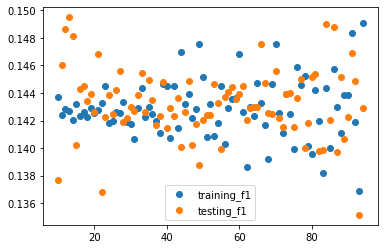

In [ ]:
# Train and test F1 score
plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
plt.legend()
plt.show()

In [ ]:
#Since it appears that there might be a minority issue in the data, we need to perform SMOTE. 


In [ ]:
#confirming bias
print('Raw counts: \n')
print(df['fraud'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df['fraud'].value_counts(normalize=True))

Raw counts: 

0    912597
1     87403
Name: fraud, dtype: int64
-----------------------------------
Normalized counts: 

0    0.912597
1    0.087403
Name: fraud, dtype: float64


In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1,1,0,0,0
1,10.829943,0.175592,1,0,0,0,0
2,5.091079,0.805153,1,0,0,1,0
3,2.247564,5.600044,1,1,0,1,0
4,44.190936,0.566486,1,1,0,1,0


In [ ]:
# Define appropriate X and y
y = df['fraud']
X = df[['distance_from_home', 'distance_from_last_transaction', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']]
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
#visualizing weighs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [11]:
from imblearn.over_sampling import SMOTE

<frozen importlib._bootstrap>:219: RuntimeWarning: sklearn.metrics._dist_metrics.DistanceMetric size changed, may indicate binary incompatibility. Expected 16 from C header, got 472 from PyObject


AttributeError: module 'sklearn.metrics._dist_metrics' has no attribute 'DistanceMetric64'